In [1]:
# 导入模块
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import leastsq
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [2]:
# 读取数据
camEdge = pd.read_excel("../附件/附件1-凸轮边缘曲线.xlsx") # 读取凸轮边缘曲线数据
valve = pd.read_excel("../附件/附件2-针阀运动曲线.xlsx")  # 读取针阀运动曲线数据
elastic = pd.read_excel("../附件/附件3-弹性模量与压力.xlsx")  # 读取弹性模量与压力数据

Text(0.5, 1.0, '凸轮边缘曲线')

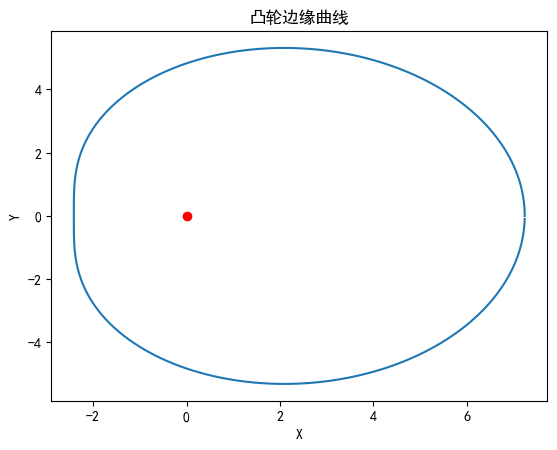

In [3]:
#% 绘图

# 绘制凸轮边缘曲线
plt.plot(camEdge['X'],camEdge['Y'], label='凸轮边缘曲线') # 绘制凸轮边缘曲线
plt.scatter(0,0, color='red', label='中心点') # 绘制中心点
plt.xlabel('X') # 设置X轴标签
plt.ylabel('Y') # 设置Y轴标签
plt.title('凸轮边缘曲线') # 设置标题


Text(0.5, 1.0, '针阀运动曲线')

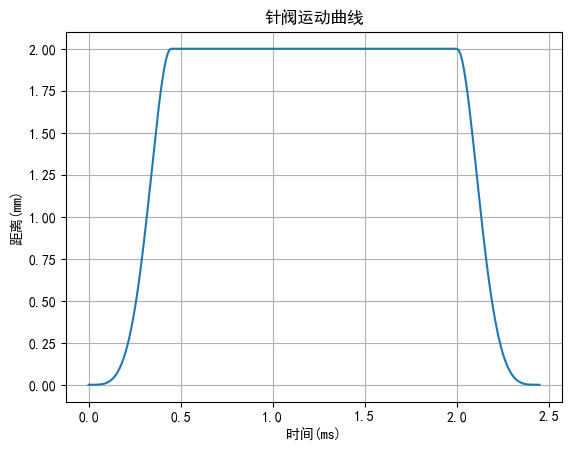

In [4]:
# 绘制针阀运动曲线
plt.plot(valve['时间(ms)'],valve['距离(mm)'], label='针阀运动曲线') # 绘制针阀运动曲线
plt.grid() # 显示网格
plt.xlabel('时间(ms)') # 设置X轴标签
plt.ylabel('距离(mm)') # 设置Y轴标签
plt.title('针阀运动曲线') # 设置标题

a = 0.00010003774839650848 b = -0.0010824801055698968 c = 5.474444230349711 d = 1531.868408407808


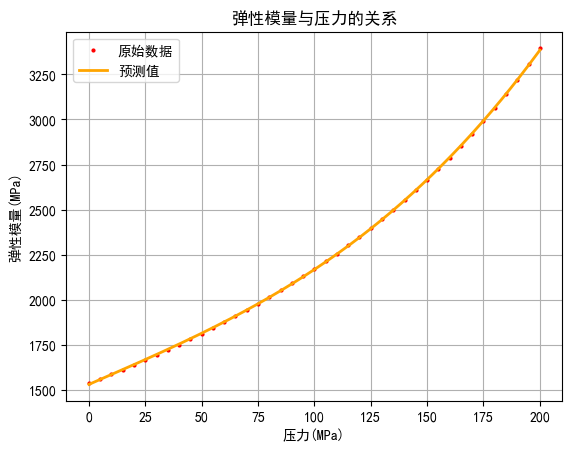

In [13]:
# 用最小二乘法拟合elastic参数

# 残差函数
def err(p, x, y):
    return y - p[0]*x**3 - p[1]*x**2 - p[2]*x - p[3]


p0 = [100, 20,10,10] # 初始参数
Xi= elastic['压力(MPa)']
Yi= elastic['弹性模量(MPa)']
ret = leastsq(err, p0, args = (Xi, Yi))
# k, b = ret[0]
# print("k =", k, "b =", b)

a, b, c , d = ret[0]
print("a =", a, "b =", b, "c =", c, "d =", d)

# 绘图
# plt.figure(figsize=(8,6))
plt.plot(Xi[::10],Yi[::10],color="red", markersize=2,marker="o",label="原始数据",linewidth=0)
x = Xi
y = a*x**3 + b*x**2 + c*x + d
plt.plot(x,y,color="orange",label="预测值",linewidth=2)

plt.xlabel("压力(MPa)")
plt.ylabel("弹性模量(MPa)")
plt.title("弹性模量与压力的关系")
plt.grid()
plt.legend()
plt.show()  

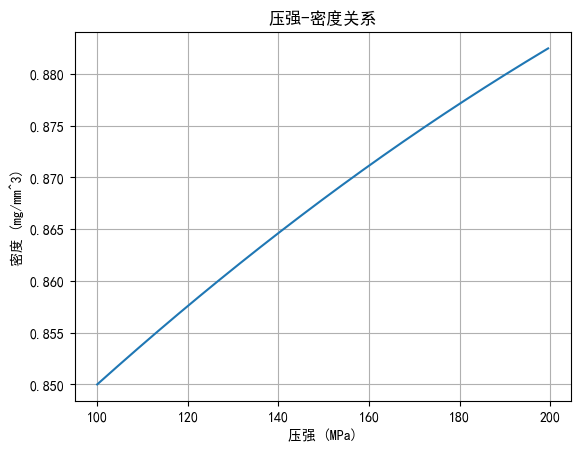

In [17]:
# 求解压力-密度关系

from scipy.integrate import odeint

def E(P):
    return a*P**3 + b*P**2 + c*P + d

def dP_drho(rho, P): # 压力-密度关系 dP/drho = rho/E(P) ,自变量
    return rho / E(P)

# 已知条件
P_0 = 100
rho_0 = 0.85

# 计算
P_values = np.arange(100,200,0.5)

rho = odeint(dP_drho, rho_0, P_values)

plt.plot(P_values, rho)
plt.title('压强-密度关系')
plt.xlabel('压强 (MPa)')
plt.ylabel('密度 (mg/mm^3)')
plt.grid()
plt.show()

